This example shows the computation of the DC bias and sensitivity in a
voltage divider.


In [6]:
import sys
sys.path.insert(0, '..')

from modules.simulator import Simulator
from modules.system import System, Wire
from modules.elements import *

import PySpice.Logging.Logging as Logging

logger = Logging.setup_logging()

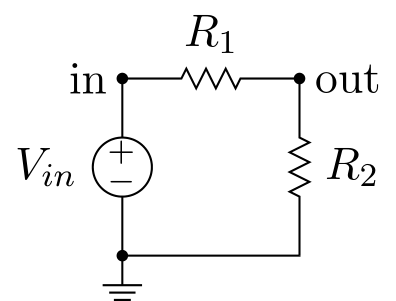

In [7]:
system = System()
voltage = Voltage(system).DC(10)
top_resistor = Resistor(system, 9)
bottom_resistor = Resistor(system, 1)
Wire(system, voltage.p, top_resistor.p)
Wire(system, voltage.n, system.ground)
Wire(system, top_resistor.n, bottom_resistor.p)
Wire(system, bottom_resistor.n, system.ground)

Wire(3->0)

In [8]:
# convert to PySpice
sim = Simulator(system)

In [9]:
circuit = sim.system_to_pyspice()

In [10]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.operating_point()
print('\n')
for node in (analysis[voltage.p.neighbor().deep_id()], analysis[bottom_resistor.p.neighbor().deep_id()]):
    print('Node {}: {} V'.format(str(node), float(node)))



Node 4: 10.0 V
Node 5: 1.0 V


C:\Users\terry\AppData\Local\Temp\ipykernel_6912\1012765031.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {} V'.format(str(node), float(node)))
